# Import

In [1]:
%matplotlib inline

from sympy import *
from sympy import lambdify, Matrix
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

# Model

In [2]:
def relative_error():
        re, ra, l, theta, lamda = symbols('re ra l theta lambda')
        dre, dra, dl, dtheta = symbols('dre dra dl dtheta')

        rl = sqrt(re ** 2 + (re + ra) ** 2 - 2 * re * (re + ra) * cos(l))
        phi = theta - asin((re / rl) * sin(l))
        P = 2 * exp(-0.5 * (phi / 0.445) ** 2) # + 20 * log(lamda / (4 * pi * rl))
        rel_err = sqrt((diff(P, l) * dl) ** 2 + (diff(P, ra) * dra) ** 2 + (diff(P, theta) * dtheta) ** 2) / P
        
        return rel_err
    
rel_err = relative_error()

In [3]:
prm_rel_err = rel_err.subs([('lamda', 700e6), ('re', 6400e3), ('ra', 800e3), ('l', 0.4759), ('theta', 1)])
surf_fun = solve(prm_rel_err - 0.01, 'dtheta')[1]
surf_fun

4.45304815263102e-36*sqrt(-5.9811505011843e+61*dl**2 - 3.66202548691643e+57*dra**2 + 2.19514900550015e+67)

# Plot

In [4]:
def plot(surf_fun, d_ra_r, d_l_r, sample=1000):
    fig = plt.figure(figsize=(16,16))
    ax = fig.gca(projection='3d')
    
    dra, dl = np.linspace(d_ra_r[0], d_ra_r[1], sample), np.linspace(d_l_r[0], d_l_r[1], sample)
    dra, dl = np.meshgrid(dra, dl)
    f = lambdify(('dra', 'dl'), surf_fun, 'numpy')
    surf = f(dra, dl)
    
    ax.plot_surface(dra, dl, surf, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    ax.set_title('error surface for dtheta')
    ax.set_xlabel('dra')
    ax.set_ylabel('dl')
    ax.set_zlabel('dtheta')

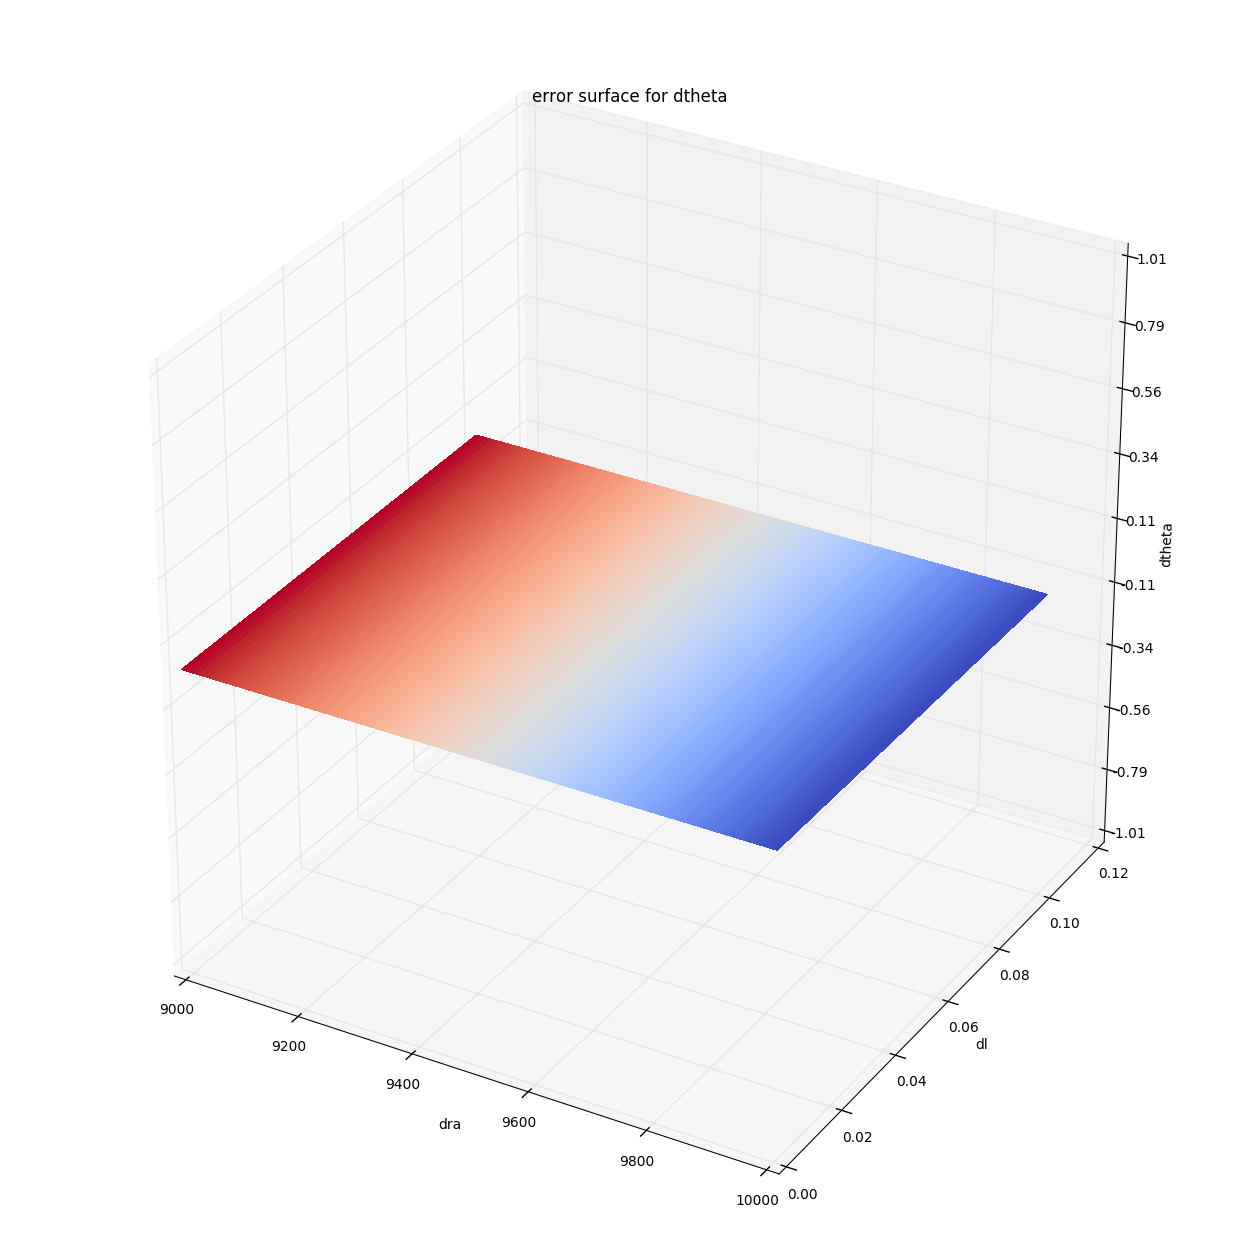

In [5]:
plot(surf_fun, d_ra_r=(9000, 10000), d_l_r=(0, 0.1), sample=1000)